In [4]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

You should consider upgrading via the 'c:\users\lamees\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\lamees\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\lamees\anaconda3\python.exe -m pip install --upgrade pip' command.


# Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# Finding the correlartion between the features

In [6]:
df = pd.read_csv('../Dataset/Admission_Predict_Ver1.1.csv')
df = df.drop('Serial No.',axis=1)
corr = df.corr()
print(corr)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.68

# Heatmap Drawing to show correlation between the features

In [38]:
#!pip install seaborn==0.10.0.rc0 --user
!pip install numpy==1.17.4 --user

You should consider upgrading via the 'c:\users\lamees\anaconda3\python.exe -m pip install --upgrade pip' command.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns; 

TypeError: 'float' object cannot be interpreted as an integer

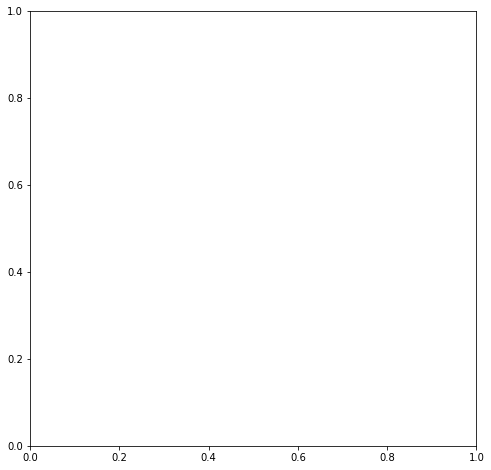

In [40]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f")
plt.show()

# Effect of University Ratings on average Chance of Admission 

In [9]:
df.sort_values(by=['University Rating'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
438,318,110,1,2.5,3.5,8.54,1,0.67
28,295,93,1,2.0,2.0,7.20,0,0.46
369,301,98,1,2.0,3.0,8.03,1,0.67
139,318,109,1,3.5,3.5,9.12,0,0.78
272,294,95,1,1.5,1.5,7.64,0,0.49


In [10]:
import plotly.graph_objects as go

In [11]:
df_avg = df.groupby('University Rating', as_index=False)['Chance of Admit '].mean()
df_avg.head()

,University Rating,Chance of Admit
0,1,0.562059
1,2,0.626111
2,3,0.702901
3,4,0.801619
4,5,0.888082


In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_avg['University Rating'], 
                         y=df_avg['Chance of Admit '],
                         mode='lines+markers'))

fig.update_layout(title='Effect of University Ratings on average Chance of Admission',
                   xaxis_title='University Rating',
                   yaxis_title='Average Chance of Admit')

# Effect of CGPA on the chance of Admission

In [13]:
df.sort_values(by=['CGPA'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
28,295,93,1,2.0,2.0,7.20,0,0.46
464,298,97,2,2.0,3.0,7.21,0,0.45
436,310,110,1,1.5,4.0,7.23,1,0.58
348,302,99,1,2.0,2.0,7.25,0,0.57


In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['CGPA'], 
                         y=df['Chance of Admit '],
                         mode='markers'))

fig.update_layout(title='Effect of CGPA on the chance of Admission',
                   xaxis_title='CGPA',
                   yaxis_title='Chance of Admit')

# The distribution of students' applications across universities (by rating)

In [15]:

df_count = df.groupby('University Rating', as_index=False).agg('count')

df_count['std_count'] = df_count['LOR ']
df_count.head()


,University Rating,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,std_count
0,1,34,34,34,34,34,34,34,34
1,2,126,126,126,126,126,126,126,126
2,3,162,162,162,162,162,162,162,162
3,4,105,105,105,105,105,105,105,105
4,5,73,73,73,73,73,73,73,73


In [16]:
fig = px.bar(df_count, y='std_count', x='University Rating', color='University Rating')

fig.update_layout(title='The distribution of students\' applications across universities (by rating)',
                   xaxis_title='University Rating',
                   yaxis_title='Number of Students' )
fig.show()

# The percentages of students' applications across universities (by rating)

In [17]:
total = df_count['std_count'].sum()
df_count['percentage'] = df_count['std_count'] / total
df_count.head()

,University Rating,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,std_count,percentage
0,1,34,34,34,34,34,34,34,34,0.068
1,2,126,126,126,126,126,126,126,126,0.252
2,3,162,162,162,162,162,162,162,162,0.324
3,4,105,105,105,105,105,105,105,105,0.210
4,5,73,73,73,73,73,73,73,73,0.146


In [19]:
colors = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
fig = px.pie(df_count,
             values=df_count['percentage'], 
             names='University Rating',
             title="The percentages of students' applications across universities (by rating)")

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo='label+percent',
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig.show()

# The impact of the various features on the chance of admission

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

In [ ]:
importance_frame.head(7)

In [ ]:
fig = px.bar(importance_frame, y='Features', x='Importance', color='Features',orientation='h')

fig.update_layout(title='The impact of the various features on the chance of admission',
                   xaxis_title='Importance',
                   yaxis_title='' )
fig.show()